<a href="https://colab.research.google.com/github/ArminD93/cost_livning_dataset/blob/dev/Cost_living_apartament.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/Cost_living/'
%run Cost_living_configuration.ipynb

/content/drive/My Drive/ColabNotebooks/Cost_living


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 162 entries, Unnamed: 0 to Quito, Ecuador
dtypes: float64(160), object(2)
memory usage: 64.1 KB


In [2]:
# Utworzenie obiektu data frame, gdzie będą przechowywane infomracje o apartamentach:
apartament = df_transponed['apartament']

DistributionObj = Distribution(apartament)
CorrelationObj = Correlation(dataset=apartament)

apartament.head()

Unnamed: 0                                        1Bed_Apartment_CityCentre  ...  Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
Region          Country            City                                      ...                                                              
Caribbean       Dominican Republic Santo Domingo                     381.17  ...                                              53.67           
Central America Costa Rica         San Jose                          461.72  ...                                              65.12           
                Mexico             Guadalajara                       309.42  ...                                              22.64           
                                   Mexico City                       550.18  ...                                              30.09           
                                   Monterrey                         342.55  ...                                              49.81           

[5 rows x 7 columns]

In [3]:
apartament.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 160 entries, ('Caribbean', 'Dominican Republic', 'Santo Domingo') to ('Western Europe', 'Switzerland', 'Zurich')
Data columns (total 7 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   1Bed_Apartment_CityCentre                                     160 non-null    float64
 1   1Bed_Apartment_OutsideofCentre                                160 non-null    float64
 2   3Bed_Apartment_CityCentre                                     160 non-null    float64
 3   3Bed_Apartment_OutsideofCentre                                160 non-null    float64
 4   Apartment_OutsideOfCentre_PricePerm2                          160 non-null    float64
 5   Apartment_inCityCentre_PricePerm2                             160 non-null    float64
 6   Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment  160 non-nu

In [4]:
apartament.index

MultiIndex([(      'Caribbean', 'Dominican Republic', 'Santo Domingo'),
            ('Central America',         'Costa Rica',      'San Jose'),
            ('Central America',             'Mexico',   'Guadalajara'),
            ('Central America',             'Mexico',   'Mexico City'),
            ('Central America',             'Mexico',     'Monterrey'),
            ('Central America',             'Panama',   'Panama City'),
            (   'Central Asia',         'Kazakhstan',        'Almaty'),
            ( 'Eastern Africa',              'Kenya',       'Nairobi'),
            (   'Eastern Asia',              'China',       'Beijing'),
            (   'Eastern Asia',              'China',      'Shanghai'),
            ...
            ( 'Western Europe',             'France',         'Paris'),
            ( 'Western Europe',            'Germany',        'Berlin'),
            ( 'Western Europe',            'Germany',     'Frankfurt'),
            ( 'Western Europe',            'Germ

In [0]:
apartament.reset_index(inplace=True)
apartament.set_index(['Country'],inplace=True)

Text(0.5, 1.0, '1Bed apartment in city centre')

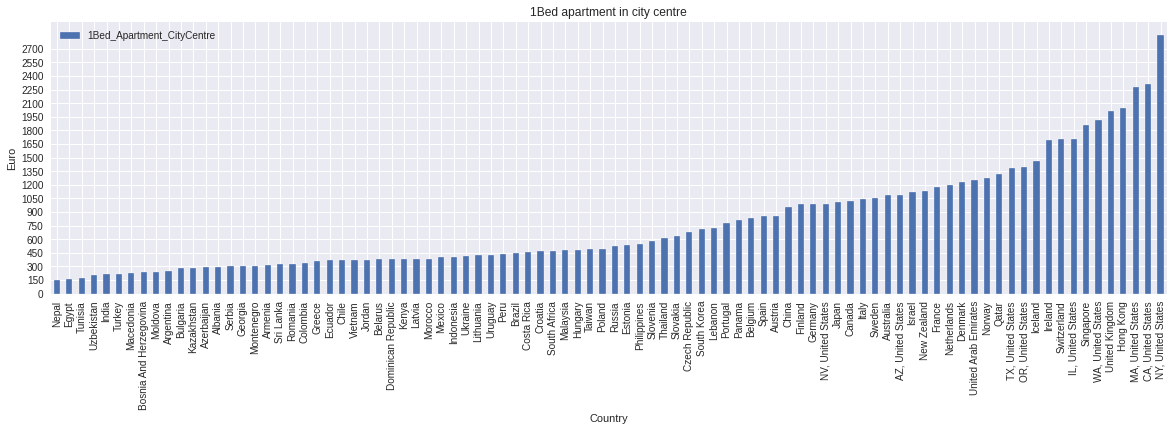

In [6]:
apartament_country_groups = apartament.groupby(by='Country')

Country_1Bed_cityCentre_mean = apartament_country_groups.agg({'1Bed_Apartment_CityCentre' : 'mean'})

# Posortowanie wartości:
Country_1Bed_cityCentre_mean.sort_values(by='1Bed_Apartment_CityCentre', inplace=True)

plt.style.use('seaborn')

Country_1Bed_cityCentre_mean.plot(figsize=(20,5), kind ='bar')
plt.yticks(np.arange(0, 2750, step=150))
plt.ylabel('Euro')
plt.title('1Bed apartment in city centre')


In [7]:
apartament.reset_index(inplace=True)
apartament.index

RangeIndex(start=0, stop=160, step=1)

In [8]:
# Posortowanie wartości
aparatamentSortedByRegion = apartament.sort_values(by='Region')

# Pogrupowanie danych
RegionGroups = aparatamentSortedByRegion.groupby(by='Region')

RegionGroupsBed_mean = RegionGroups.agg({
                                      '1Bed_Apartment_CityCentre'      : 'mean',
                                      '1Bed_Apartment_OutsideofCentre' : 'mean',

                                      '3Bed_Apartment_CityCentre'      : 'mean',
                                      '3Bed_Apartment_OutsideofCentre' : 'mean',
                                      
                                      'Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment'  : 'mean'   
                                      })

RegionGroupsBed_mean.head()

,1Bed_Apartment_CityCentre,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_CityCentre,3Bed_Apartment_OutsideofCentre,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
Region,,,,,
Caribbean,381.170000,203.640000,754.180,359.540000,53.670000
Central America,495.100000,338.130000,960.874,660.954000,51.728000
Central Asia,288.220000,178.040000,565.150,357.570000,58.480000
Eastern Africa,383.880000,170.650000,832.140,403.170000,46.900000
Eastern Asia,1029.163333,647.196667,2330.525,1365.758333,110.833333


In [9]:
RegionGroupsBed_mean.reset_index(inplace=True)
RegionGroupsBed_mean.index

RangeIndex(start=0, stop=17, step=1)

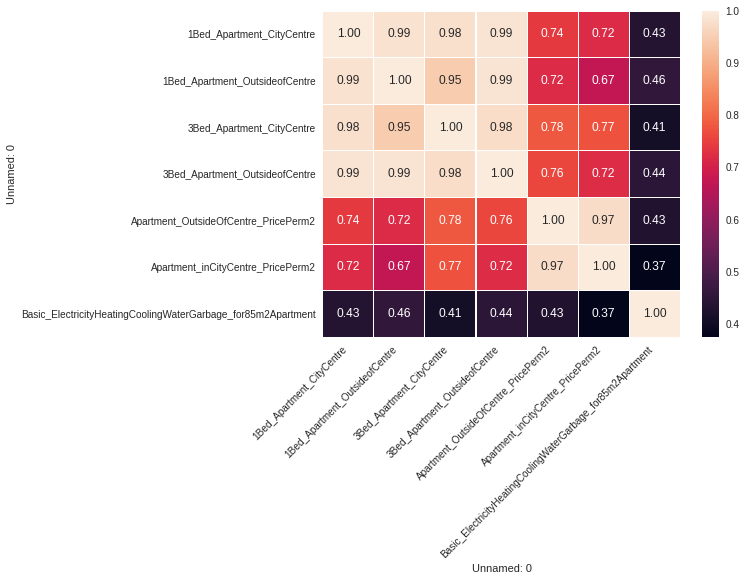

In [10]:
CorrelationObj.addCorrelationmap

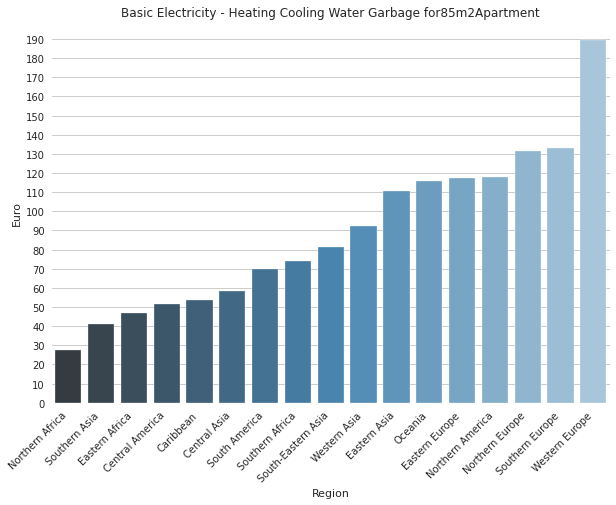

In [11]:
SortedBed_RegionGroups_mean = RegionGroupsBed_mean.sort_values(by='Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment')

x_data= 'Region'
sns.set_style('whitegrid') 
plt.figure(figsize=(10,7))
plt.yticks(np.arange(0, 250, step=10))

g = sns.barplot(  data=SortedBed_RegionGroups_mean, x=x_data,  y='Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment',palette='Blues_d'  )

g.set( xlabel='Region', ylabel='Euro', title='Basic Electricity - Heating Cooling Water Garbage for85m2Apartment')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

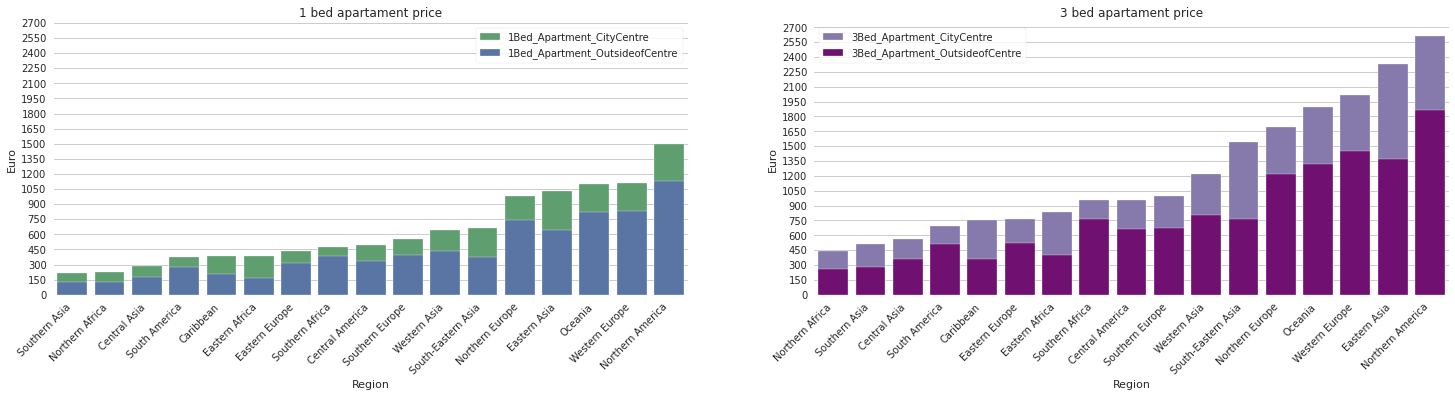

In [12]:
sns.set_style('whitegrid') 
f, axes = plt.subplots(1, 2, figsize=(25, 5))



SortedBed_RegionGroups_mean = RegionGroupsBed_mean.sort_values(by='1Bed_Apartment_CityCentre')
g = sns.barplot(x="Region", y="1Bed_Apartment_CityCentre", data=SortedBed_RegionGroups_mean, label="1Bed_Apartment_CityCentre", color="g", ax=axes[0] )       
g = sns.barplot(x="Region", y="1Bed_Apartment_OutsideofCentre", data=SortedBed_RegionGroups_mean,  label="1Bed_Apartment_OutsideofCentre", color="b", ax=axes[0])
axes[0].set( xlabel='Region',ylabel='Euro', title='1 bed apartament price'  )
axes[0].set_xticklabels(  g.get_xticklabels(), rotation=45, horizontalalignment='right',  fontweight='light',)


SortedBed_RegionGroups_mean = RegionGroupsBed_mean.sort_values(by='3Bed_Apartment_CityCentre')
g2 = sns.barplot(x="Region", y="3Bed_Apartment_CityCentre", data=SortedBed_RegionGroups_mean, label="3Bed_Apartment_CityCentre", color="m", ax=axes[1])       
g2 = sns.barplot(x="Region", y="3Bed_Apartment_OutsideofCentre", data=SortedBed_RegionGroups_mean,  label="3Bed_Apartment_OutsideofCentre", color="purple", ax=axes[1])
axes[1].set( xlabel='Region',ylabel='Euro', title='3 bed apartament price'  )
axes[1].set_xticklabels(  g2.get_xticklabels(), rotation=45, horizontalalignment='right',  fontweight='light',)


axes[0].set_yticks(np.arange(0, 2750, step=150))
axes[1].set_yticks(np.arange(0, 2750, step=150))

axes[0].legend( frameon=True)
axes[1].legend( frameon=True)
plt.show()

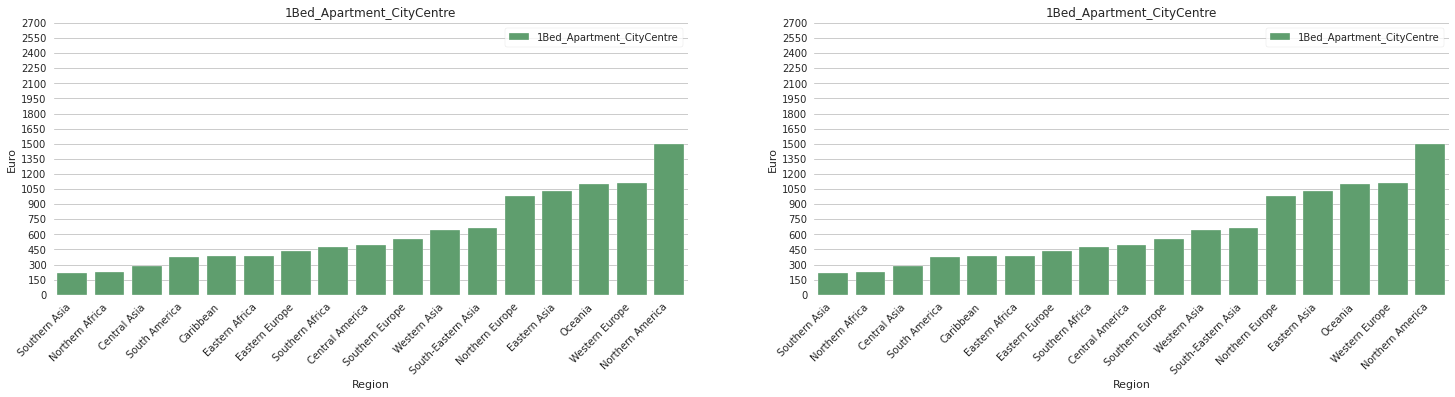

In [13]:
sns.set_style('whitegrid') 
g, axes = plt.subplots(1, 2, figsize=(25, 5))

aparament_dict = {'g' : '1Bed_Apartment_CityCentre', 'b' : '1Bed_Apartment_OutsideofCentre', 'm' : '3Bed_Apartment_CityCentre', 'purple' : '3Bed_Apartment_OutsideofCentre'}

for i in range(2):
    SortedBed_RegionGroups_mean = RegionGroupsBed_mean.sort_values(by='1Bed_Apartment_CityCentre')
    g = sns.barplot(x="Region", y='1Bed_Apartment_CityCentre', data=SortedBed_RegionGroups_mean, label='1Bed_Apartment_CityCentre', color='g', ax=axes[i] )
    axes[i].set( xlabel='Region',ylabel='Euro', title='1Bed_Apartment_CityCentre' )
    axes[i].set_xticklabels(  axes[i].get_xticklabels(), rotation=45, horizontalalignment='right',  fontweight='light',)
    axes[i].set_yticks(np.arange(0, 2750, step=150))
    axes[i].legend( frameon=True)



In [14]:
apartament.head(2)

Unnamed: 0,Country,Region,City,1Bed_Apartment_CityCentre,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_CityCentre,3Bed_Apartment_OutsideofCentre,Apartment_OutsideOfCentre_PricePerm2,Apartment_inCityCentre_PricePerm2,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
0,Dominican Republic,Caribbean,Santo Domingo,381.17,203.64,754.18,359.54,672.98,1203.97,53.67
1,Costa Rica,Central America,San Jose,461.72,405.66,884.11,757.82,1305.61,1412.49,65.12


In [15]:
apartament.set_index(['Region', 'Country', 'City', 'Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment',
                       'Apartment_inCityCentre_PricePerm2', 'Apartment_OutsideOfCentre_PricePerm2',
                      '1Bed_Apartment_OutsideofCentre', '3Bed_Apartment_OutsideofCentre', ], inplace=True)


apartament_stacked = apartament.stack().to_frame()
apartament_stacked.reset_index(inplace=True)
apartament_stacked.head(2)

,Region,Country,City,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,Apartment_inCityCentre_PricePerm2,Apartment_OutsideOfCentre_PricePerm2,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_OutsideofCentre,Unnamed: 0,0
0,Caribbean,Dominican Republic,Santo Domingo,53.67,1203.97,672.98,203.64,359.54,1Bed_Apartment_CityCentre,381.17
1,Caribbean,Dominican Republic,Santo Domingo,53.67,1203.97,672.98,203.64,359.54,3Bed_Apartment_CityCentre,754.18


In [16]:
newapartamentColNames = { 'Unnamed: 0'  :   'CityCentre_rooms',
                                     0  :   'CityCentre_Price'}

apartament_stacked.rename(columns=newapartamentColNames, inplace=True)
apartament_stacked.head(2)

,Region,Country,City,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,Apartment_inCityCentre_PricePerm2,Apartment_OutsideOfCentre_PricePerm2,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_OutsideofCentre,CityCentre_rooms,CityCentre_Price
0,Caribbean,Dominican Republic,Santo Domingo,53.67,1203.97,672.98,203.64,359.54,1Bed_Apartment_CityCentre,381.17
1,Caribbean,Dominican Republic,Santo Domingo,53.67,1203.97,672.98,203.64,359.54,3Bed_Apartment_CityCentre,754.18


In [17]:
apartament_stacked.set_index(['Region', 'Country', 'City', 'Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment',
                       'Apartment_inCityCentre_PricePerm2', 'Apartment_OutsideOfCentre_PricePerm2',
                       'CityCentre_rooms', 	'CityCentre_Price'], inplace=True)

apartament_stacked = apartament_stacked.stack().to_frame()
apartament_stacked.reset_index(inplace=True)

apartament_stacked.head(2)

,Region,Country,City,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,Apartment_inCityCentre_PricePerm2,Apartment_OutsideOfCentre_PricePerm2,CityCentre_rooms,CityCentre_Price,level_8,0
0,Caribbean,Dominican Republic,Santo Domingo,53.67,1203.97,672.98,1Bed_Apartment_CityCentre,381.17,1Bed_Apartment_OutsideofCentre,203.64
1,Caribbean,Dominican Republic,Santo Domingo,53.67,1203.97,672.98,1Bed_Apartment_CityCentre,381.17,3Bed_Apartment_OutsideofCentre,359.54


In [18]:
newapartamentColNames = { 'level_8'  :   'OutsideofCentre_rooms',
                                  0  :   'OutsideofCentre_Price'}

apartament_stacked.rename(columns=newapartamentColNames, inplace=True)
apartament_stacked.head(2)

,Region,Country,City,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,Apartment_inCityCentre_PricePerm2,Apartment_OutsideOfCentre_PricePerm2,CityCentre_rooms,CityCentre_Price,OutsideofCentre_rooms,OutsideofCentre_Price
0,Caribbean,Dominican Republic,Santo Domingo,53.67,1203.97,672.98,1Bed_Apartment_CityCentre,381.17,1Bed_Apartment_OutsideofCentre,203.64
1,Caribbean,Dominican Republic,Santo Domingo,53.67,1203.97,672.98,1Bed_Apartment_CityCentre,381.17,3Bed_Apartment_OutsideofCentre,359.54


In [19]:
apartament_stacked.set_index(['Region', 'Country', 'City', 'Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment',
                       'CityCentre_rooms', 	'CityCentre_Price',
                       'OutsideofCentre_rooms', 'OutsideofCentre_Price'], inplace=True)

apartament_stacked = apartament_stacked.stack().to_frame()
apartament_stacked.reset_index(inplace=True)
apartament_stacked.head(2)

,Region,Country,City,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,CityCentre_rooms,CityCentre_Price,OutsideofCentre_rooms,OutsideofCentre_Price,level_8,0
0,Caribbean,Dominican Republic,Santo Domingo,53.67,1Bed_Apartment_CityCentre,381.17,1Bed_Apartment_OutsideofCentre,203.64,Apartment_inCityCentre_PricePerm2,1203.97
1,Caribbean,Dominican Republic,Santo Domingo,53.67,1Bed_Apartment_CityCentre,381.17,1Bed_Apartment_OutsideofCentre,203.64,Apartment_OutsideOfCentre_PricePerm2,672.98


In [20]:
newapartamentColNames = { 'level_8'  :   'PricePerm2_city_Outside_centre',
                                  0  :   'PricePerm2_Price'}

apartament_stacked.rename(columns=newapartamentColNames, inplace=True)
apartament_stacked.head(2)

,Region,Country,City,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,CityCentre_rooms,CityCentre_Price,OutsideofCentre_rooms,OutsideofCentre_Price,PricePerm2_city_Outside_centre,PricePerm2_Price
0,Caribbean,Dominican Republic,Santo Domingo,53.67,1Bed_Apartment_CityCentre,381.17,1Bed_Apartment_OutsideofCentre,203.64,Apartment_inCityCentre_PricePerm2,1203.97
1,Caribbean,Dominican Republic,Santo Domingo,53.67,1Bed_Apartment_CityCentre,381.17,1Bed_Apartment_OutsideofCentre,203.64,Apartment_OutsideOfCentre_PricePerm2,672.98


In [21]:
apartament.head()

Unnamed: 0                                                                                                                                                                                                                                1Bed_Apartment_CityCentre  3Bed_Apartment_CityCentre
Region          Country            City          Basic_ElectricityHeatingCoolingWaterGarbage_for... Apartment_inCityCentre_PricePerm2 Apartment_OutsideOfCentre_PricePerm2 1Bed_Apartment_OutsideofCentre 3Bed_Apartment_OutsideofCentre                                                      
Caribbean       Dominican Republic Santo Domingo 53.67                                              1203.97                           672.98                               203.64                         359.54                                             381.17                     754.18
Central America Costa Rica         San Jose      65.12                                              1412.49                           1305.61                              405.66                         757.82                                             461.72                     884.11
                Mexico             Guadalajara   22.64                                              1016.15                           922.24                               186.98                         388.33                                             309.42                     634.96
                                   Mexico City   30.09                                              2188.90                           1438.46                              342.38                         734.62                                             550.18                    1139.78
                                   Monterrey     49.81                                              1021.06                           632.67                               207.90                         461.34                                             342.55                     757.86

In [22]:
apartament.reset_index(inplace=True)
apartament.set_index(['Country','City'],inplace=True)
apartament.index

MultiIndex([('Dominican Republic', 'Santo Domingo'),
            (        'Costa Rica',      'San Jose'),
            (            'Mexico',   'Guadalajara'),
            (            'Mexico',   'Mexico City'),
            (            'Mexico',     'Monterrey'),
            (            'Panama',   'Panama City'),
            (        'Kazakhstan',        'Almaty'),
            (             'Kenya',       'Nairobi'),
            (             'China',       'Beijing'),
            (             'China',      'Shanghai'),
            ...
            (            'France',         'Paris'),
            (           'Germany',        'Berlin'),
            (           'Germany',     'Frankfurt'),
            (           'Germany',       'Hamburg'),
            (           'Germany',        'Munich'),
            (       'Netherlands',     'Amsterdam'),
            (       'Netherlands',     'Eindhoven'),
            (       'Netherlands',     'Rotterdam'),
            (       'Netherlan

In [23]:
apartament['Region'].value_counts()

Eastern Europe        28
Northern America      21
Southern Europe       18
Western Asia          14
Northern Europe       13
Southern Asia         13
Western Europe        12
South America          7
South-Eastern Asia     7
Oceania                6
Eastern Asia           6
Central America        5
Northern Africa        4
Southern Africa        3
Caribbean              1
Eastern Africa         1
Central Asia           1
Name: Region, dtype: int64

In [0]:
apartament.reset_index(inplace=True)

In [25]:
apartament.head()

Unnamed: 0,Country,City,Region,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,Apartment_inCityCentre_PricePerm2,Apartment_OutsideOfCentre_PricePerm2,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_OutsideofCentre,1Bed_Apartment_CityCentre,3Bed_Apartment_CityCentre
0,Dominican Republic,Santo Domingo,Caribbean,53.67,1203.97,672.98,203.64,359.54,381.17,754.18
1,Costa Rica,San Jose,Central America,65.12,1412.49,1305.61,405.66,757.82,461.72,884.11
2,Mexico,Guadalajara,Central America,22.64,1016.15,922.24,186.98,388.33,309.42,634.96
3,Mexico,Mexico City,Central America,30.09,2188.90,1438.46,342.38,734.62,550.18,1139.78
4,Mexico,Monterrey,Central America,49.81,1021.06,632.67,207.90,461.34,342.55,757.86


In [26]:
apartament_region = apartament[['Region', '1Bed_Apartment_OutsideofCentre', 	'3Bed_Apartment_OutsideofCentre', 	'1Bed_Apartment_CityCentre', 	'3Bed_Apartment_CityCentre']]

apartament_region.set_index('Region', inplace=True)
apartament_region.head()

Unnamed: 0,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_OutsideofCentre,1Bed_Apartment_CityCentre,3Bed_Apartment_CityCentre
Region,,,,
Caribbean,203.64,359.54,381.17,754.18
Central America,405.66,757.82,461.72,884.11
Central America,186.98,388.33,309.42,634.96
Central America,342.38,734.62,550.18,1139.78
Central America,207.90,461.34,342.55,757.86


In [27]:
# Pogrupowanie danych
apartament_region = apartament_region.groupby(by='Region')


apartament_region_mean = apartament_region.agg(
                                                {
                                                  '1Bed_Apartment_OutsideofCentre' : 'mean',
                                                  '3Bed_Apartment_OutsideofCentre' : 'mean',
                                                  '1Bed_Apartment_CityCentre'      : 'mean',    
                                                  '3Bed_Apartment_CityCentre'      : 'mean',                                                                                   
                                                 }
                                               )

# Posortowanie wartości
apartament_region_mean = apartament_region_mean.sort_values(
                                                            by=[
                                                                '1Bed_Apartment_OutsideofCentre', '3Bed_Apartment_OutsideofCentre',
                                                                '1Bed_Apartment_CityCentre', 	    '3Bed_Apartment_CityCentre'
                                                                ]
                                                            )

apartament_region_mean.head()


,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_OutsideofCentre,1Bed_Apartment_CityCentre,3Bed_Apartment_CityCentre
Region,,,,
Southern Asia,123.541538,277.926154,216.570,515.410769
Northern Africa,124.012500,256.487500,222.495,440.927500
Eastern Africa,170.650000,403.170000,383.880,832.140000
Central Asia,178.040000,357.570000,288.220,565.150000
Caribbean,203.640000,359.540000,381.170,754.180000


In [28]:
apartament.sample(frac=0.02)

Unnamed: 0,Country,City,Region,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,Apartment_inCityCentre_PricePerm2,Apartment_OutsideOfCentre_PricePerm2,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_OutsideofCentre,1Bed_Apartment_CityCentre,3Bed_Apartment_CityCentre
44,Morocco,Casablanca,Northern Africa,35.74,1769.77,875.41,180.27,383.51,386.18,793.74
19,Czech Republic,Prague,Eastern Europe,177.27,4972.45,3474.20,593.84,908.64,805.86,1294.80
94,Malaysia,Kuala Lumpur,South-Eastern Asia,48.02,2759.98,1362.08,273.76,450.90,478.24,845.42


In [29]:
apartamentGreaterthan400 = apartament['1Bed_Apartment_CityCentre'] >= 400
apartament[apartamentGreaterthan400].head(3)

Unnamed: 0,Country,City,Region,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,Apartment_inCityCentre_PricePerm2,Apartment_OutsideOfCentre_PricePerm2,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_OutsideofCentre,1Bed_Apartment_CityCentre,3Bed_Apartment_CityCentre
1,Costa Rica,San Jose,Central America,65.12,1412.49,1305.61,405.66,757.82,461.72,884.11
3,Mexico,Mexico City,Central America,30.09,2188.90,1438.46,342.38,734.62,550.18,1139.78
5,Panama,Panama City,Central America,90.98,1953.02,1430.09,547.73,962.66,811.63,1387.66


In [30]:
isWesternEurope = apartament['Region'] == 'Western Europe'
apartament[isWesternEurope].head(3)

Unnamed: 0,Country,City,Region,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,Apartment_inCityCentre_PricePerm2,Apartment_OutsideOfCentre_PricePerm2,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_OutsideofCentre,1Bed_Apartment_CityCentre,3Bed_Apartment_CityCentre
148,Austria,Vienna,Western Europe,158.45,6403.78,4164.43,621.65,1105.34,858.37,1584.20
149,Belgium,Brussels,Western Europe,122.98,3232.14,2538.10,686.19,1116.71,838.20,1432.14
150,France,Paris,Western Europe,170.29,11203.03,8334.37,837.76,1736.93,1177.51,2597.17


In [31]:
isEurope = apartament['Region'].str.contains('Europe')
apartament[isEurope].sort_values(by='Region').head(3)

Unnamed: 0,Country,City,Region,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,Apartment_inCityCentre_PricePerm2,Apartment_OutsideOfCentre_PricePerm2,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_OutsideofCentre,1Bed_Apartment_CityCentre,3Bed_Apartment_CityCentre
14,Belarus,Minsk,Eastern Europe,48.29,1526.65,1067.94,244.90,386.38,376.92,593.05
41,Uzbekistan,Tashkent,Eastern Europe,31.53,802.53,390.61,124.02,239.90,209.86,449.24
40,Ukraine,Odessa,Eastern Europe,94.58,1107.23,645.76,232.04,405.27,344.01,599.79


In [0]:
# Posortowanie wartości
aparatamentSortedByRegion = apartament.sort_values(by='Region')

# Pogrupowanie danych
RegionGroups = aparatamentSortedByRegion.groupby(by='Region')

In [33]:
RegionGroups.size()

Region
Caribbean              1
Central America        5
Central Asia           1
Eastern Africa         1
Eastern Asia           6
Eastern Europe        28
Northern Africa        4
Northern America      21
Northern Europe       13
Oceania                6
South America          7
South-Eastern Asia     7
Southern Africa        3
Southern Asia         13
Southern Europe       18
Western Asia          14
Western Europe        12
dtype: int64

In [34]:
my_aggregation = ['min','max','mean','std']

apartamentCityCentre_MinMaxMeanStd = RegionGroups.agg({
                                                        'Apartment_inCityCentre_PricePerm2'     : my_aggregation,
                                                        '1Bed_Apartment_CityCentre'             : my_aggregation,
                                                        '3Bed_Apartment_CityCentre'             : my_aggregation,                                                                                      
                                                      })

# Zaokrąglenie wartości:
apartamentCityCentre_MinMaxMeanStd = np.ceil(apartamentCityCentre_MinMaxMeanStd)
apartamentCityCentre_MinMaxMeanStd.head()

Apartment_inCityCentre_PricePerm2           ... 3Bed_Apartment_CityCentre        
                                              min      max  ...                      mean     std
Region                                                      ...                                  
Caribbean                                  1204.0   1204.0  ...                     755.0     NaN
Central America                            1017.0   2189.0  ...                     961.0   304.0
Central Asia                               1120.0   1120.0  ...                     566.0     NaN
Eastern Africa                             2704.0   2704.0  ...                     833.0     NaN
Eastern Asia                               9582.0  27721.0  ...                    2331.0  1154.0

[5 rows x 12 columns]

In [35]:
apartamentOutsideofCentre_MinMaxMeanStd = RegionGroups.agg({             
                                                            'Apartment_OutsideOfCentre_PricePerm2'  : my_aggregation,
                                                            '1Bed_Apartment_OutsideofCentre'        : my_aggregation, 
                                                            '3Bed_Apartment_OutsideofCentre'        : my_aggregation,                                                                                       
                                                          })
# Zaokrąglenie wartości:
apartamentOutsideofCentre_MinMaxMeanStd = np.ceil(apartamentOutsideofCentre_MinMaxMeanStd)
apartamentOutsideofCentre_MinMaxMeanStd.head()

Apartment_OutsideOfCentre_PricePerm2           ... 3Bed_Apartment_OutsideofCentre       
                                                 min      max  ...                           mean    std
Region                                                         ...                                      
Caribbean                                      673.0    673.0  ...                          360.0    NaN
Central America                                633.0   1439.0  ...                          661.0  235.0
Central Asia                                   692.0    692.0  ...                          358.0    NaN
Eastern Africa                                 728.0    728.0  ...                          404.0    NaN
Eastern Asia                                  5269.0  17533.0  ...                         1366.0  738.0

[5 rows x 12 columns]

In [36]:
apartament.head()

Unnamed: 0,Country,City,Region,Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment,Apartment_inCityCentre_PricePerm2,Apartment_OutsideOfCentre_PricePerm2,1Bed_Apartment_OutsideofCentre,3Bed_Apartment_OutsideofCentre,1Bed_Apartment_CityCentre,3Bed_Apartment_CityCentre
0,Dominican Republic,Santo Domingo,Caribbean,53.67,1203.97,672.98,203.64,359.54,381.17,754.18
1,Costa Rica,San Jose,Central America,65.12,1412.49,1305.61,405.66,757.82,461.72,884.11
2,Mexico,Guadalajara,Central America,22.64,1016.15,922.24,186.98,388.33,309.42,634.96
3,Mexico,Mexico City,Central America,30.09,2188.90,1438.46,342.38,734.62,550.18,1139.78
4,Mexico,Monterrey,Central America,49.81,1021.06,632.67,207.90,461.34,342.55,757.86


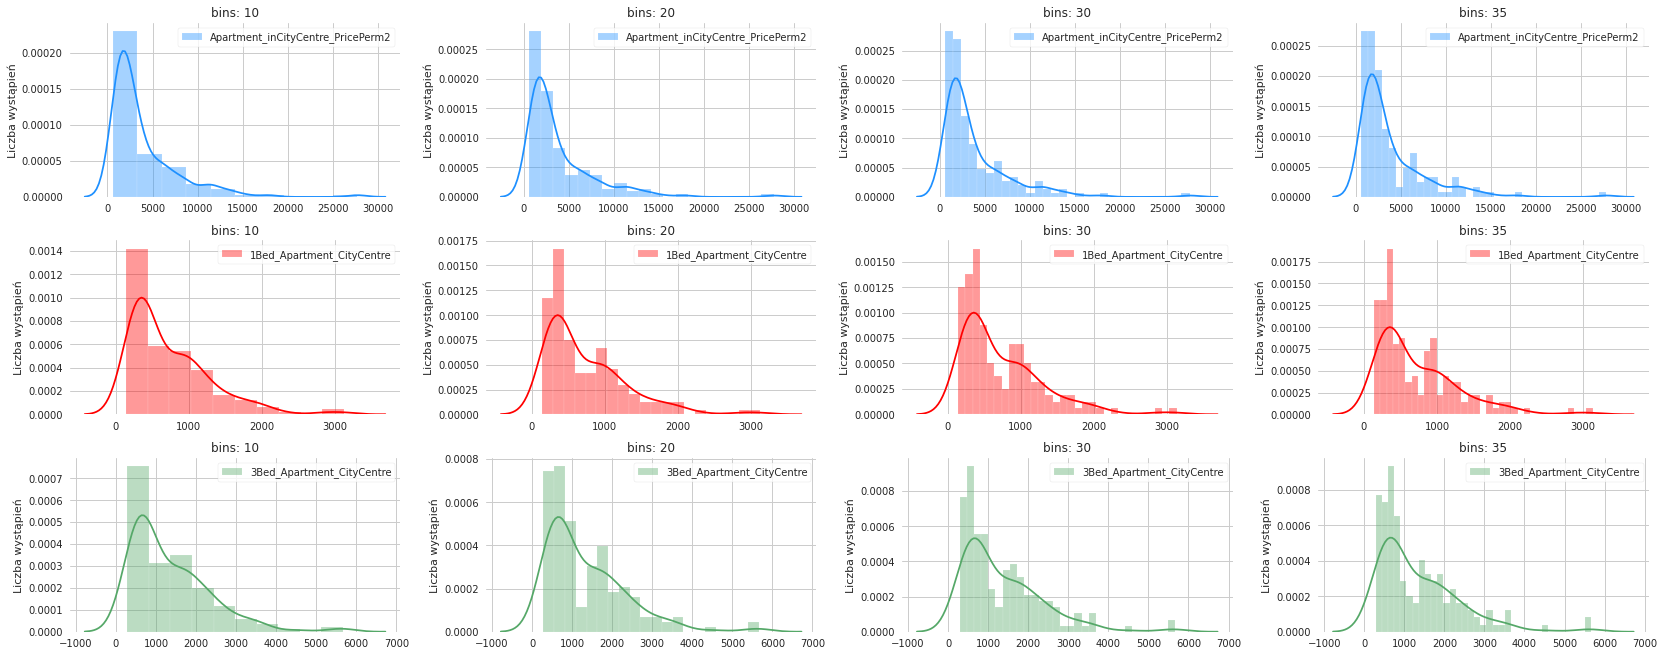

In [37]:
apartament_inside = ['Apartment_inCityCentre_PricePerm2', '1Bed_Apartment_CityCentre','3Bed_Apartment_CityCentre']
                                                                                                     
binsValues = [10,20,30,35]
DistributionObj.addHist_with_variety_values_of_bins(value=apartament_inside, bins=binsValues, set_width=23,  set_height=9)       

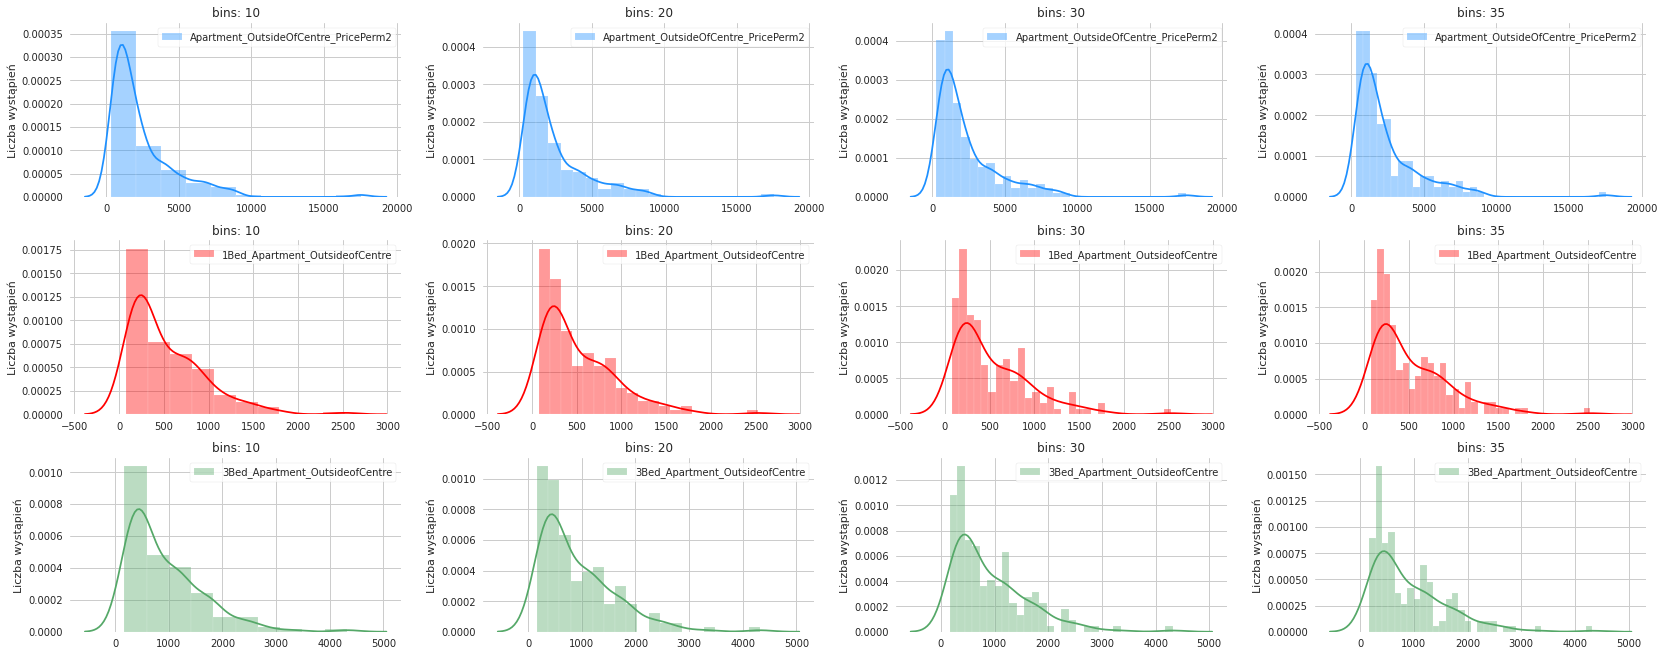

In [38]:
apartament_outside = [ 'Apartment_OutsideOfCentre_PricePerm2',  '1Bed_Apartment_OutsideofCentre', '3Bed_Apartment_OutsideofCentre']
                                                                                                 
binsValues = [10,20,30,35]
DistributionObj.addHist_with_variety_values_of_bins(value=apartament_outside, bins=binsValues, set_width=23,  set_height=9, )    

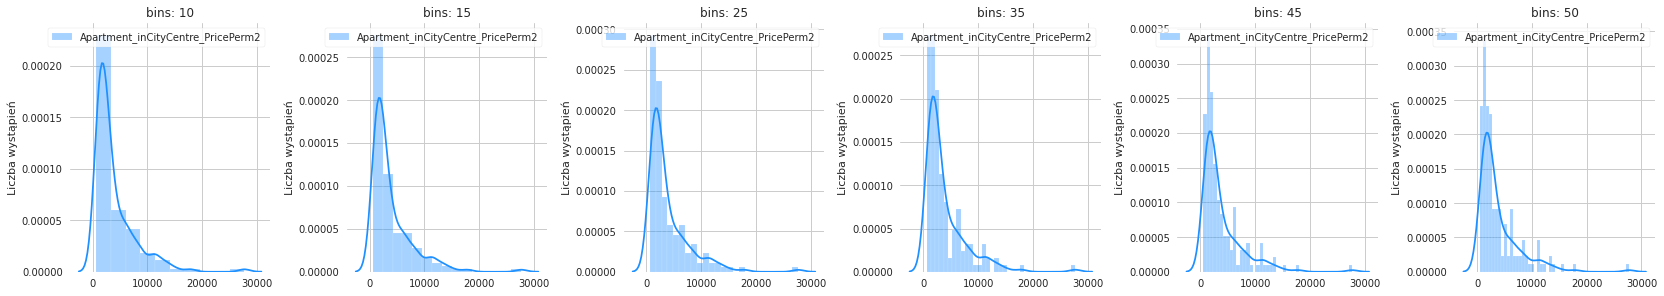

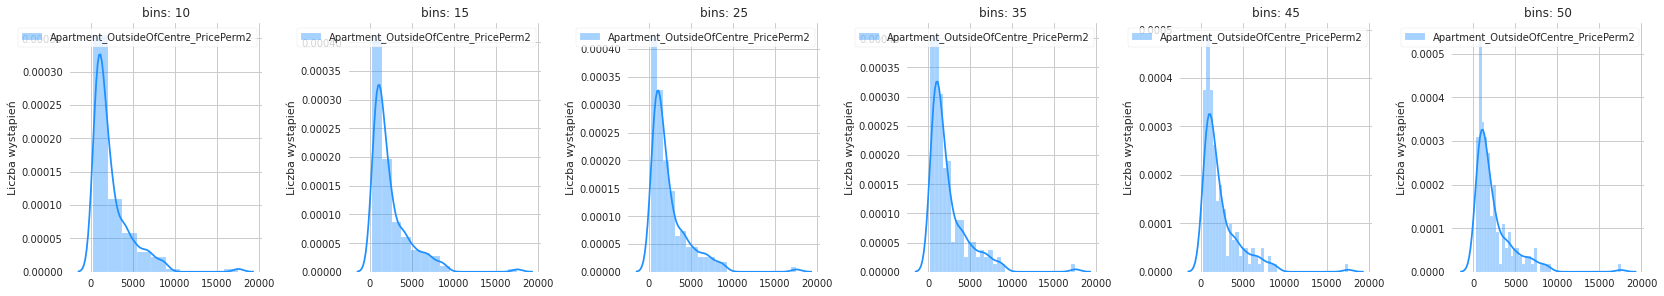

In [39]:
binsValues = [10, 15, 25, 35, 45, 50]
DistributionObj.addHist_with_variety_values_of_bins(value=apartament_inside[0], bins=binsValues, set_width=23, set_height=4)
print()
DistributionObj.addHist_with_variety_values_of_bins(value=apartament_outside[0], bins=binsValues, set_width=23, set_height=4)

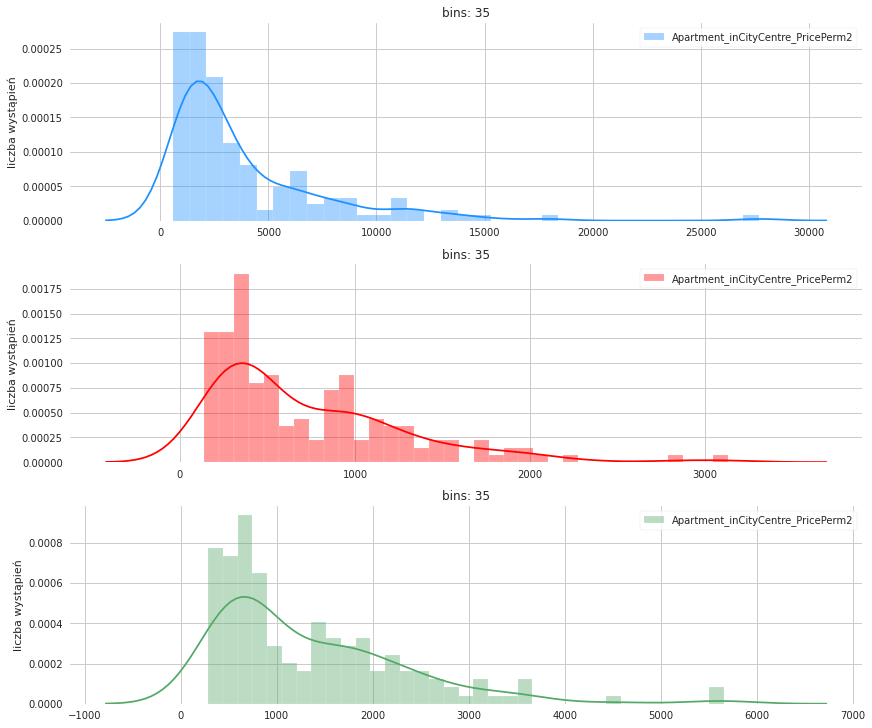

In [40]:
DistributionObj.addHist(value=apartament_inside, bins=35, set_height=10, set_width=12 )

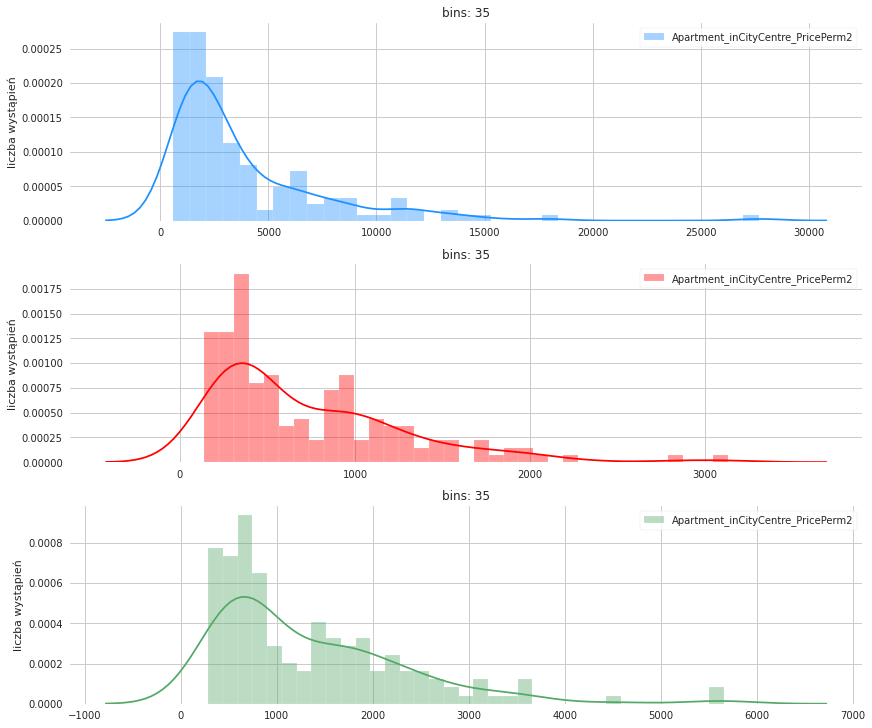

In [41]:
 DistributionObj.addHist(value=apartament_inside, bins=35, set_height=10, set_width=12 )

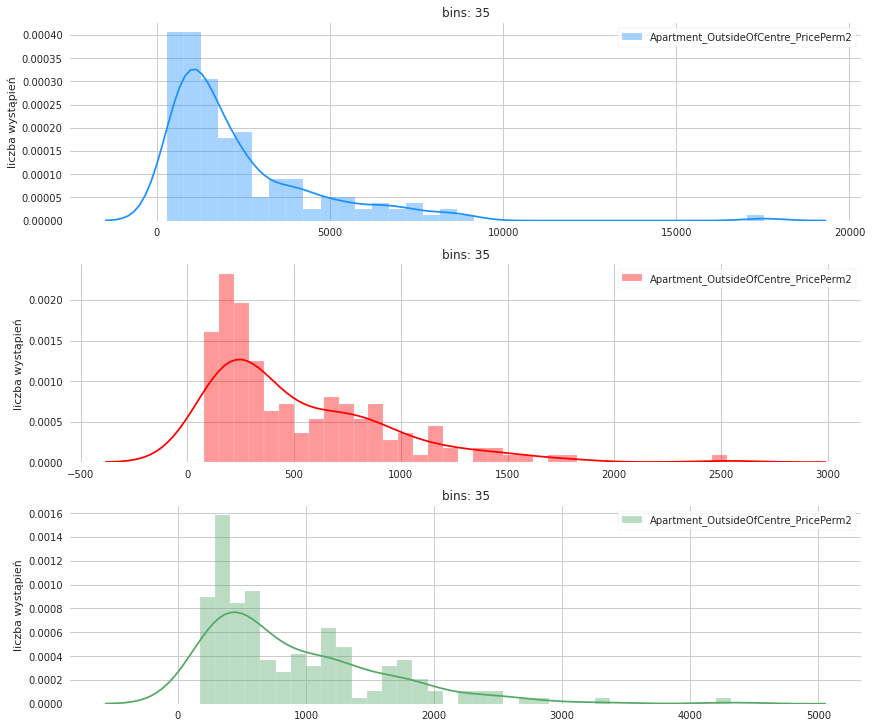

In [42]:
 DistributionObj.addHist(value=apartament_outside, bins=35, set_height=10, set_width=12 )


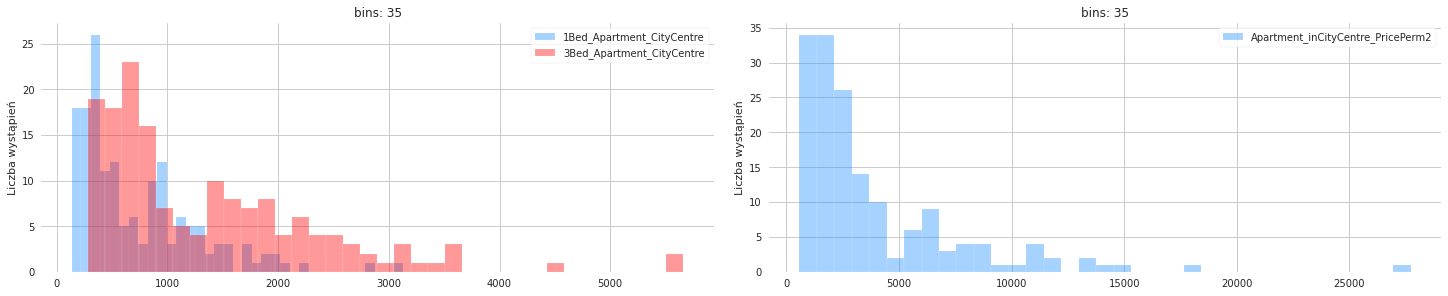

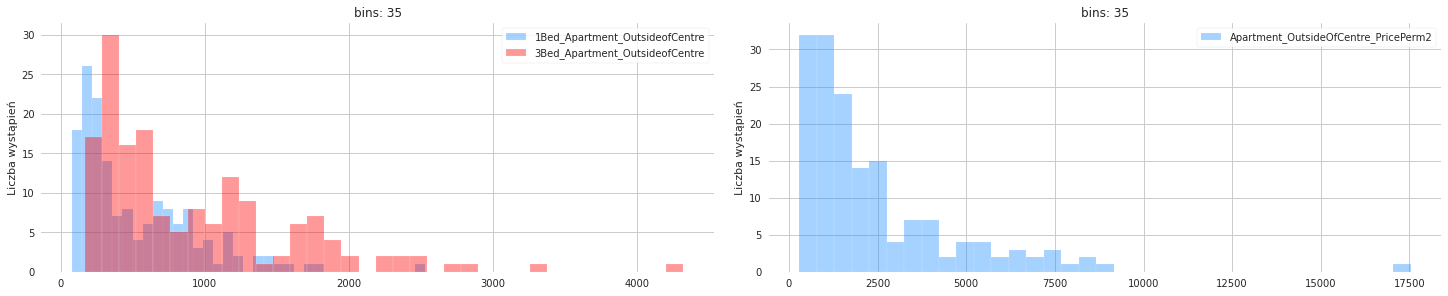

In [43]:
DistributionObj.addStackedHist(list= apartament_inside, bins=35, set_width=20, set_height=4)
DistributionObj.addStackedHist(list= apartament_outside, bins=35, set_width=20, set_height=4)

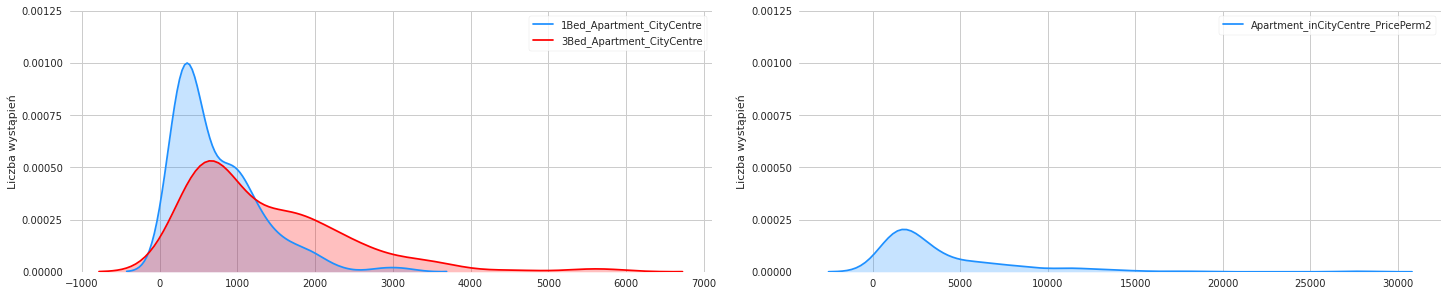

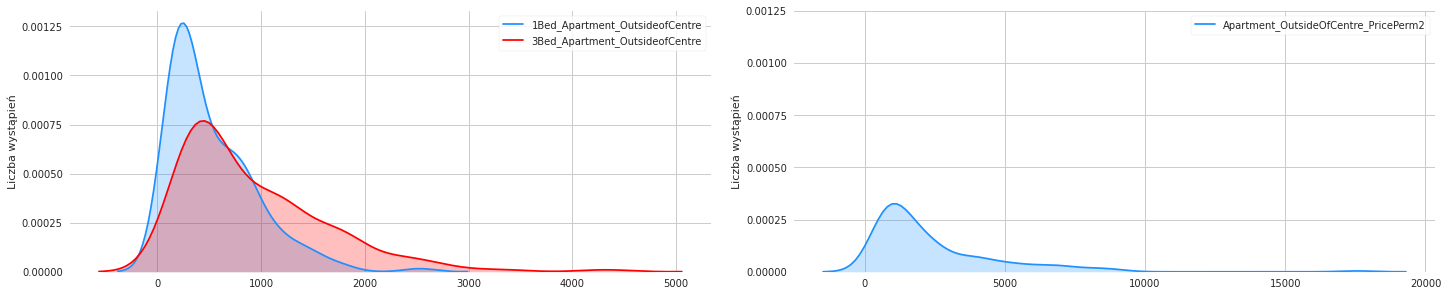

In [44]:
DistributionObj.addDensityDistribution(value=apartament_inside, set_width=20, set_height=4, y_max=0.0015, step=0.00025)
DistributionObj.addDensityDistribution(value=apartament_outside, set_width=20, set_height=4,y_max=0.0015, step=0.00025)